#                                                                         Project Report - MileStone 3 (Group 1004)


This report is meant to showcase our group's progress on the course project, milestone 2 in particular. The following document contains information and proof of completeion of all required tasks for this milestone, namely Markdown Skills, Git Branching, Method Chaining, Exploratory Data Analysis (EDA) conducted by each member of the group, and the Research Analysis notebook which contains answers to the research questions based on our dataset. 

## Task 1 - Markdown Skills

For this task, we were asked to edit all the READMEs in the repository by using some of the markdown skills that we have learned. While it is not possible to showcase every single README in this report, the following screenshot taken from the main README file should serve as an example:
![README](/images/README_sample.PNG)


## Task 2 - Git Branching

For this task, each team member was asked to complete the tutorial for git branching and submit a screenshot for proof of completion. However, each team member was required to complete this task individually as part of Lab 5. Therefore, this task will not be covered in this report.


## Task 3 - Method Chaining

This task required the creation of a script file called 'project_functions.py' which contained method chains to clean our dataset and make it ready for analysis. Each group member was then required to call the function containing the method chains in their personal milestone file. While it is not possible to showcase all functions of the file in this report, here is a screenshot of the function containing the method chains for cleaning our dataset and add new columns:
![CHAIN](/images/CHAIN_sample.PNG)


## Task 4 - Exploratory Data Analysis

This Task required each individual group member to conduct an EDA on the dataset by looking into topics and outliers that they found interesting. All the EDAs of each group member are found below:

### EDA (Sarvagya)

In [1]:
import pandas as pd
import numpy as np
from scripts import project_functions as pf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pfp

# Loads data, does some cleaning and adds new columns "Weight Class" and "Age Group"

insurance_cleaned = pf.load_and_process("../../data/raw/insurance.csv")
insurance_cleaned.head()

Age   Sex   BMI  Children Smoker     Region  Insurance Cost Weight Class  \
0   18  male  23.2         0     no  southeast         1121.87       Normal   
1   18  male  30.1         0     no  southeast         1131.51        Obese   
2   18  male  33.3         0     no  southeast         1135.94        Obese   
3   18  male  33.7         0     no  southeast         1136.40        Obese   
4   18  male  34.1         0     no  southeast         1137.01        Obese   

  Age Group  
0     Youth  
1     Youth  
2     Youth  
3     Youth  
4     Youth

We start with df.describe() to get a general idea of the the values in the dataset and to find any outliers.

In [2]:
insurance_cleaned.describe().T

count          mean           std      min        25%  \
Age             1338.0     39.207025     14.049960    18.00    27.0000   
BMI             1338.0     30.663303      6.098257    16.00    26.3000   
Children        1338.0      1.094918      1.205493     0.00     0.0000   
Insurance Cost  1338.0  13270.422280  12110.011259  1121.87  4740.2875   

                    50%        75%       max  
Age               39.00     51.000     64.00  
BMI               30.40     34.700     53.10  
Children           1.00      2.000      5.00  
Insurance Cost  9382.03  16639.915  63770.43

Now, we can make a pair plot to identify any obvious relationships between 2 or more variables.

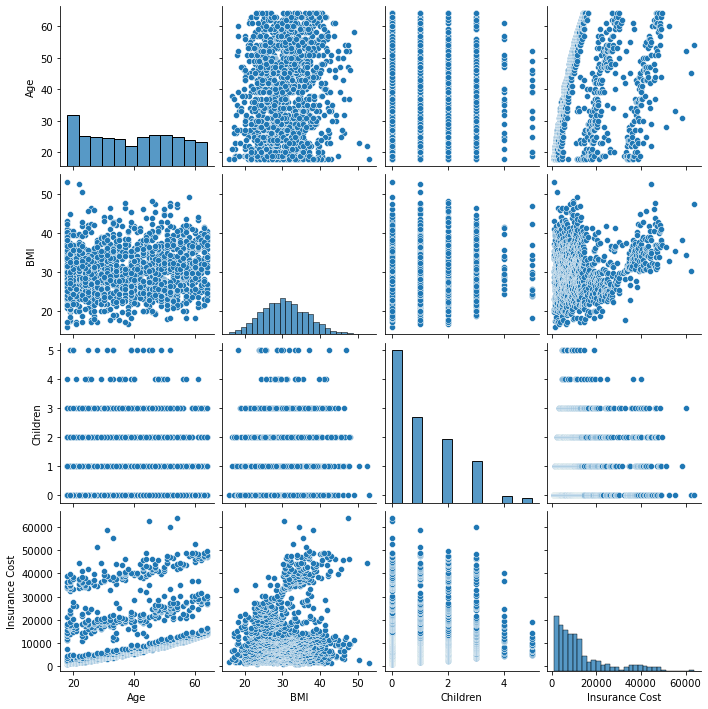

In [3]:
sns.pairplot(data = insurance_cleaned)

Insurance Cost and Age have a relationship that will not be discussed until task 5 due to the nature of my research Question. We do not know the number of smokers and non-smokers, and the number of males and females yet. Let's find it out.

In [4]:
print("SMOKER COUNT:\n", insurance_cleaned['Smoker'].value_counts(),"\n\n")
print("NUMBER OF MALES AND FEMALES:\n", insurance_cleaned['Sex'].value_counts(),"\n\n")

SMOKER COUNT:
 no     1064
yes     274
Name: Smoker, dtype: int64 


NUMBER OF MALES AND FEMALES:
 male      676
female    662
Name: Sex, dtype: int64 




We can see that the number of males is almost the same as the number of females. However, there are clearly many more non-smokers than people who smoke.

After looking at the table from 'df.describe()', I have noticed that the average BMI is exceptionally high. I would like to see the distribution of males and females in the different weight classes using the newly created column as my data and a count plot.

[Text(0.5, 1.0, 'People Grouped by Weight Class')]

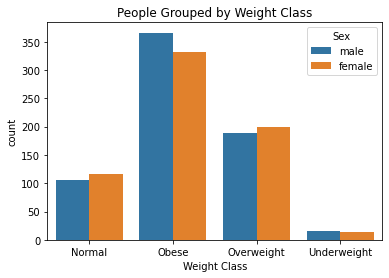

In [5]:
sns.countplot(x = "Weight Class", data = insurance_cleaned, hue = "Sex").set(title = "People Grouped by Weight Class")

We can see that the majority of the people fall under the "Overweight" or "Obese" category. There is only a minor difference between counts for males and females across all the weight classes; They are very similar. This makes me wonder which region has the highest amount of "Overweight" or "Obese" people and which region comparatively has the healthiest people in terms of BMI.

[Text(0.5, 1.0, 'Regional Counts of People in Different Weight Classes')]

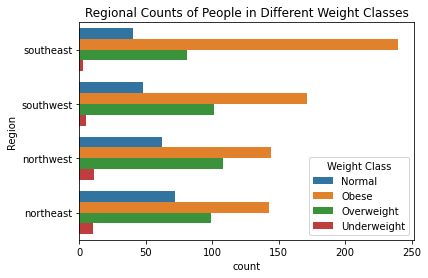

In [6]:
sns.countplot(y = "Region", hue = "Weight Class", data = insurance_cleaned).set(title = "Regional Counts of People in Different Weight Classes")

We can see from the graphs above that the South-East region has the highest number of obese people, while the North-West region has the highest amount of Overweight people. People in the North-East are relatively the healthiest. Now I want to check what factors affect BMI and which one is causing it to be so high across all regions. I do this by creating graphs of suspected variables against BMI. Firstly, I check if Age is related to BMI using a scatter plot:

[Text(0.5, 1.0, 'Age vs. BMI')]

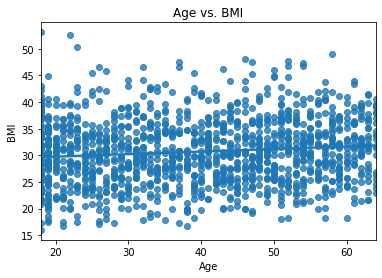

In [7]:
sns.regplot(x = "Age", y = "BMI", data = insurance_cleaned).set(title = "Age vs. BMI")

Then, I check the BMI of smokers and non-smokers using a strip plot:

[Text(0.5, 1.0, 'BMI of Smokers vs. Non-Smokers')]

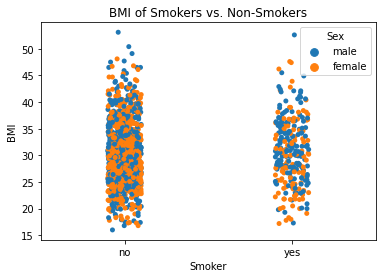

In [8]:
sns.stripplot(x = 'Smoker', y = "BMI", data = insurance_cleaned, hue = 'Sex').set(title = "BMI of Smokers vs. Non-Smokers")

Age and BMI seem to have extremely weak correlation to my disappointment. The regression line is almost horizontal. The strip plot has some interesting results; BMI doesn't seem to be affected by whether a person smokes or not since the distributions for both categories are almost similar. However, adding a hue pertaining to 'Sex' tells us that there are more men who smoke than women, and that there are more non-smokers than smokers in our dataset. This makes the higher-than-average BMI for the dataset even stranger and could mean that BMI is affected by factors that are not present in this dataset.

Another thing that seems abnormal from the df.describe() we performed in the beginning is the standard deviation for the insurance cost. I want to check for outliers using a box plot on insurance cost:

[Text(0.5, 1.0, 'Box Plot for Insurance Cost')]

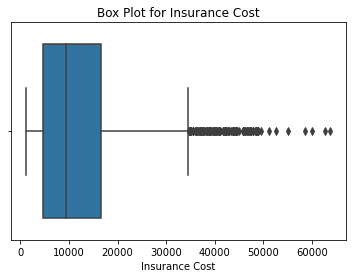

In [9]:
sns.boxplot(data = insurance_cleaned, x = "Insurance Cost").set(title = "Box Plot for Insurance Cost")

The Average insurance cost seems to be around 10,000, with most of the values in the dataset falling in he 8000 to 15000 range.There are Many outliers as shown in the above box plot. Reasons behind outliers will be looked into in Task 5, where we focus our analysis on insurance costs and answer our research questions.


### EDA (Quinn)

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from scripts import project_functions as pf

insurance_cleaned = pf.load_and_process("../../data/raw/insurance.csv")
insurance_cleaned.head()



Age   Sex   BMI  Children Smoker     Region  Insurance Cost Weight Class  \
0   18  male  23.2         0     no  southeast         1121.87       Normal   
1   18  male  30.1         0     no  southeast         1131.51        Obese   
2   18  male  33.3         0     no  southeast         1135.94        Obese   
3   18  male  33.7         0     no  southeast         1136.40        Obese   
4   18  male  34.1         0     no  southeast         1137.01        Obese   

  Age Group  
0     Youth  
1     Youth  
2     Youth  
3     Youth  
4     Youth

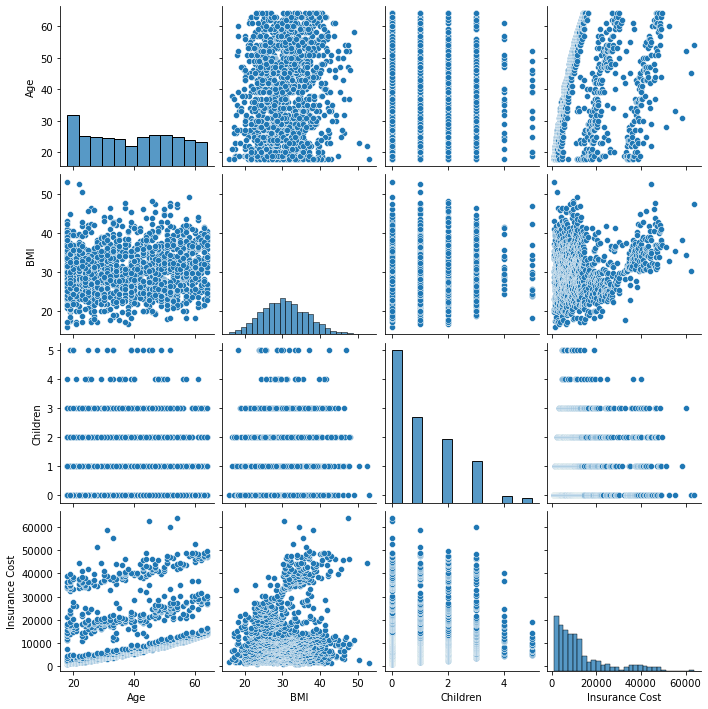

In [11]:
sns.pairplot(insurance_cleaned)

#There are a few things we can make of this pairplot. First off, lets ignore the Children column
#because it only has values of either 0 or 1. We can see that Age and Insurance cost
#seem to have a positive correlation meaning as age increases, so does the insurance cost. Another 
#postitive correlation i can see is between Insurance cost and BMI. I want to look a little further 
#into the correlation between BMI and Age.

In [12]:
plot_age_bmi = insurance_cleaned.loc[:,['Age', 'BMI']]
plot_age_bmi.describe().T

#From this we know that the average age is around 39 and the average bmi is roughly 30


count       mean        std   min   25%   50%   75%   max
Age  1338.0  39.207025  14.049960  18.0  27.0  39.0  51.0  64.0
BMI  1338.0  30.663303   6.098257  16.0  26.3  30.4  34.7  53.1

[Text(0.5, 1.0, 'BMI vs count')]

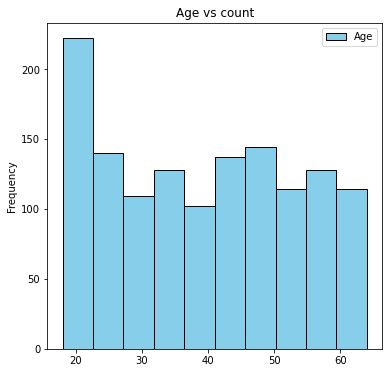

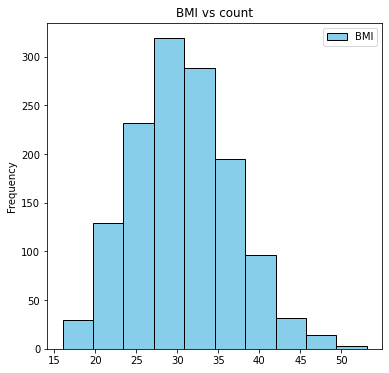

In [13]:
age = insurance_cleaned.loc[:,['Age']]
bmi = insurance_cleaned.loc[:,['BMI']]
age.plot(kind = 'hist', color = 'skyblue', ec = 'black', figsize = (6,6)).set(title="Age vs count")
bmi.plot(kind = 'hist', color = 'skyblue', ec = 'black', figsize = (6,6)).set(title="BMI vs count")

#From these histograms we can better visualize the data from above 



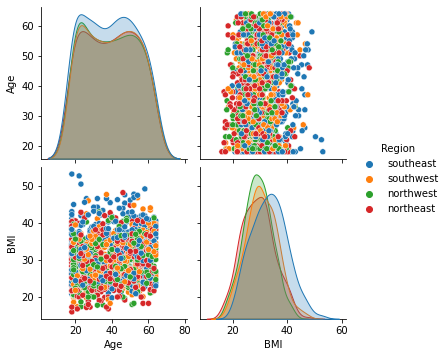

In [14]:
plot_age_bmi_region = insurance_cleaned.loc[:,['Age', 'BMI', 'Region']]
sns.pairplot(plot_age_bmi_region, hue = 'Region')

#Now, I am using a pairplot with just Age and BMI to see how they correlate and am including the Region just for fun.
#It seems that there is not really a correlation between Age and BMI which seems accurate as studies suggest that
#BMI does not age into account. However, it is interesting to see that BMI seems to be the highest in the Northwest
#Region when age is roughly around 30.

[Text(0.5, 1.0, 'Age vs BMI')]

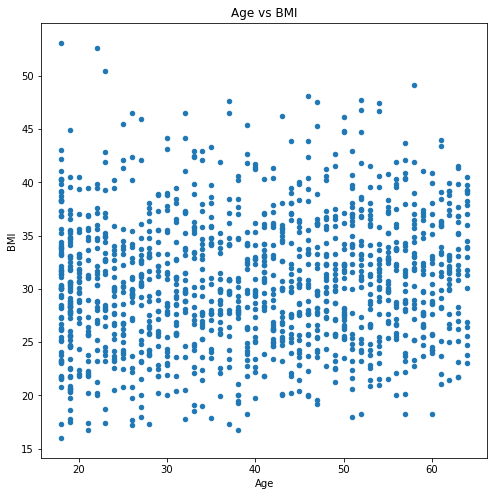

In [15]:
plot_age_bmi.plot(kind = 'scatter', x = 'Age', y = 'BMI', figsize = (8,8)).set(title="Age vs BMI")

#Lastly, here is a scatter plot with BMI as the y-axis and Age and the x-axis. This plot also seems to show
#that there is not much significance between Age and BMI. Thus we can conclude that age does not seem to have any 
#correlation to BMI.


### EDA (Emily)

In [16]:
import pandas as pd
import numpy as np
from scripts import project_functions as pf
import matplotlib.pyplot as plt

insurance_cleaned = pf.load_and_process("../../data/raw/insurance.csv")
insurance_cleaned.head()


Age   Sex   BMI  Children Smoker     Region  Insurance Cost Weight Class  \
0   18  male  23.2         0     no  southeast         1121.87       Normal   
1   18  male  30.1         0     no  southeast         1131.51        Obese   
2   18  male  33.3         0     no  southeast         1135.94        Obese   
3   18  male  33.7         0     no  southeast         1136.40        Obese   
4   18  male  34.1         0     no  southeast         1137.01        Obese   

  Age Group  
0     Youth  
1     Youth  
2     Youth  
3     Youth  
4     Youth

In [17]:
insurance_cleaned.describe()

Age          BMI     Children  Insurance Cost
count  1338.000000  1338.000000  1338.000000     1338.000000
mean     39.207025    30.663303     1.094918    13270.422280
std      14.049960     6.098257     1.205493    12110.011259
min      18.000000    16.000000     0.000000     1121.870000
25%      27.000000    26.300000     0.000000     4740.287500
50%      39.000000    30.400000     1.000000     9382.030000
75%      51.000000    34.700000     2.000000    16639.915000
max      64.000000    53.100000     5.000000    63770.430000

In [18]:
import pandas_profiling as pdp

dfprofile = pdp.ProfileReport(insurance_cleaned)
dfprofile

#pandas_profiling gives us some interesting information, such as:
# - 1338 observations in the datset
# - 4 numeric variables, 1 categorical variable and 1 boolean variable

<AxesSubplot:xlabel='Age', ylabel='Insurance Cost'>

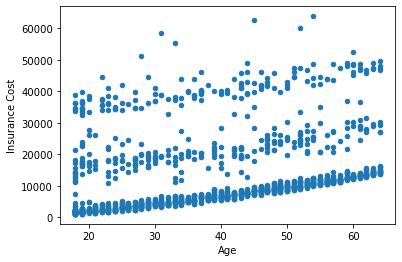

In [19]:
insurance_cleaned.plot(kind = 'scatter', x = 'Age', y = 'Insurance Cost')

#Below is a scatterplot showing age on the X-axis and Insurance cost on the Y-axis.
#We can observe a slight trend of increasing insurance cost as age increases, but the trend is not very distinct.

<AxesSubplot:ylabel='Frequency'>

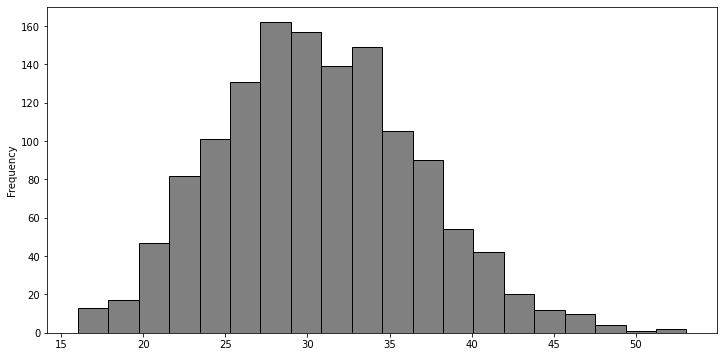

In [20]:
insurance_cleaned['BMI'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')
# Below is a histogram showing the frequency of BMI's in the dataset.
# Most BMI's fall in the range of 25-35
# There are some outliers on both ends of the histogram
# The histogram is slightly positively skewed

<AxesSubplot:>

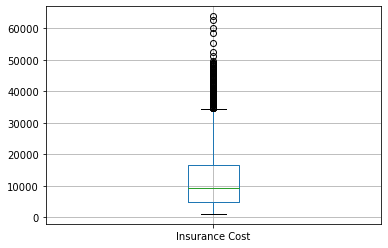

In [21]:
insurance_cleaned.boxplot('Insurance Cost')
# Below is a boxplot of insurance cost
# We can see that that there are several outliers to the positive extreme

<AxesSubplot:ylabel='Region'>

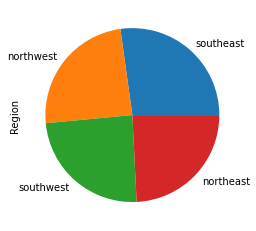

In [22]:
insurance_cleaned['Region'].value_counts().plot(kind='pie')
# Below is a pie chart showing the distribution of regions
# The greatest number of participants resided in the southeast area
# But, the spread of region is relatively evenly distirbuted throughout the 4 regions


In [24]:
import seaborn as sns

sns.set_theme(style="ticks", font_scale = 1.3)

plt.rc("axes.spines", top=False, right=False)

Question: Does having more children mean parents are more likelier to smoke? (Average children for non-smokers and smokers then compare)

In [25]:
non_smokers = insurance_cleaned['Smoker'] == 'no'
mean_for_nonsmokers = insurance_cleaned.loc[non_smokers, 'Children'].mean()
print("The mean number of children for non-smokers is ", mean_for_nonsmokers)

smokers = insurance_cleaned['Smoker'] == 'yes'
mean_for_smokers = insurance_cleaned.loc[smokers, 'Children'].mean()
print("The mean number of children for smokers is ", mean_for_smokers)


The mean number of children for non-smokers is  1.0902255639097744
The mean number of children for smokers is  1.1131386861313868


Text(18.17367754166667, 0.5, 'Frequency')

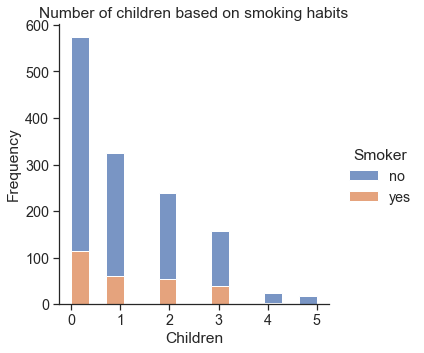

In [27]:
sns.displot(data=insurance_cleaned, x="Children", hue = 'Smoker', multiple= "stack")
plt.title("Number of children based on smoking habits")
plt.ylabel('Frequency')

Text(17.671002416666667, 0.5, 'Frequency')

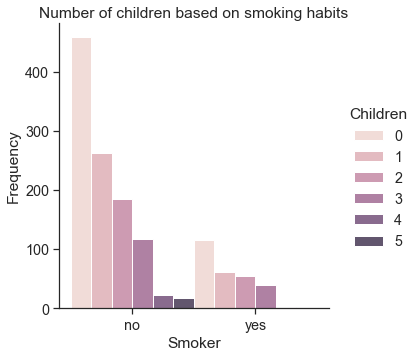

In [28]:
sns.displot(data=insurance_cleaned, x="Smoker", hue = 'Children', multiple = "dodge")
plt.title("Number of children based on smoking habits")
plt.ylabel("Frequency")

## Task 5 - Research Analysis

For this task, we were asked to use our data visualization skills to analyze and answer our research questions on the dataset from Milestone 1. 

### Research Analysis (Group Work)

#### **Research Questions and Analysis**

After doing our individual EDAs and getting more insight on the different variables in our dataset and how they relate to each other, we have narrowed our research down 
to the following two questions: 

***RQ 1. What factors affect the insurance cost and how do they correlate to it?***

***RQ 2. Which region is most affected by each of these factors? Is this region also the one with the highest insurance costs?***

Both of these questions are relational in nature and are both focused on Insurance Costs as that is the most important variable of our dataset and also our main focus for analysis. 

#### **Age and BMI vs. Insurance Cost**

After taking a brief look at our dataset in milestone 1, we suspected that an increase in Age and/or BMI would also cause an increase in Insurance Costs. Lets begin by analyzing these 2 variables first:

The following are the graphs of Age and BMI against Insurance Cost:


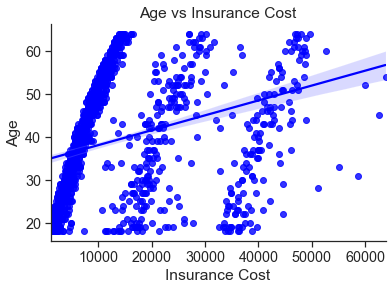

[Text(0.5, 1.0, 'BMI vs Insurance Cost')]

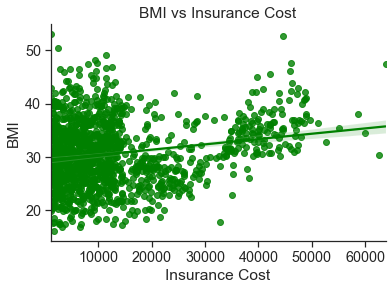

In [29]:
import pandas as pd
import numpy as np
from scripts import project_functions as pf
import seaborn as sns
import matplotlib.pyplot as plt

insurance_cleaned = pf.load_and_process("../../data/raw/insurance.csv")
sns.regplot(x = 'Insurance Cost', y = 'Age', data = insurance_cleaned, color = 'blue').set(title = "Age vs Insurance Cost")
plt.show()
sns.regplot(x = "Insurance Cost", y = "BMI", data = insurance_cleaned, color = 'green').set(title = "BMI vs Insurance Cost")

A scatterplot was chosen to show the comparison for both Age and BMI against Insurance Cost. This makes it easier to identify if there is any correlation between the two.

Graph 1 tells us that Age and Insurance Cost have a **Strong Positive Correlation** which is pretty evident by looking at the line of regression. This makes sense as old age can cause many medical problems, which leads to an increase in insurance costs.

Graph 2, however, is a little harder to analyze since the correlation, while present and positive, is not very strong. Being overweight or obese can lead to health problems which in turn increases insurance costs, but it is not very clear from the graph alone. Lets take a look at the average values of the Insurance cost of all Weight Classes:

In [30]:
# From project_functions, find average Insurance costs by Weight class. 

pf.insurance_avg_by_weight(insurance_cleaned)

Insurance Cost
Weight Class                
Underweight     10126.660345
Normal          10379.499685
Overweight      11000.079203
Obese           15585.776676

There is a substantial increase in Insurance Cost as we go down the "Weight Class" column. Therefore, we can consider BMI to be another factor affecting the Insurance Cost.

#### **Number of Children and Smokers vs. Insurance Cost**

Now that we have tested the variables that we suspected, it is time to check for the others too. 

Below is a table with the average Insurance Cost against the number of children. 

In [31]:
# From project_functions, find average Insurance costs by Number of Children. 

pf.insurance_avg_by_child(insurance_cleaned)

Insurance Cost
Children                
5            8786.035556
0           12365.975610
1           12731.171728
4           13850.656800
2           15073.563833
3           15355.318408

Unlike the previous table, Insurance cost does NOT increase as number of children increases. Therefore, number of children do not seem to influence Insurance Cost at all.

Now, let's check if being a smoker affects one's medical costs:

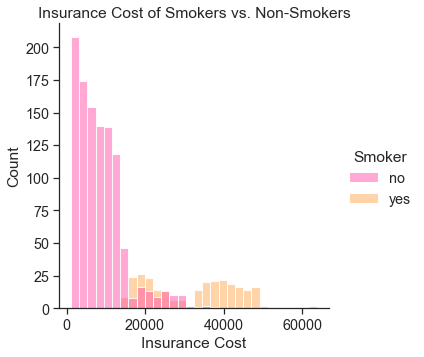

In [32]:
sns.displot(data = insurance_cleaned, x = "Insurance Cost", hue = "Smoker", palette = 'spring').set(title = "Insurance Cost of Smokers vs. Non-Smokers")

The Histogram above shows us that almost all of the non-smokers have much lower insurance costs, and the opposite for the smokers, which means being a smoker is a factor that affects insurance cost. This result also seems valid as smoking can cause serious respiratory issues, which can increase medical costs.

From our analysis, we can now list the factors that affect Insurance costs, and how strong their correlation is:
1. Age - Strong Positive Correlation
2. BMI - Weak Positive Correlation
3. Smoker - Strong Positive Correlation

This answers our *RQ 1*, and now we can move on to *RQ 2* and examine regional insurance costs, and which region is most affected by each of the factors listed above.


Lets start with smokers vs. non-smokers. Here is a count plot showcasing which region has the highest number of smokers and non-smokers:

<AxesSubplot:xlabel='Smoker', ylabel='count'>

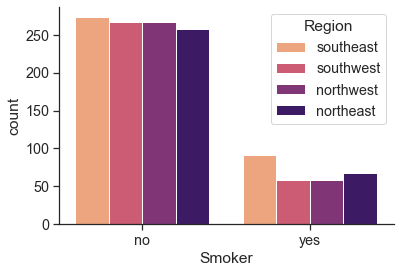

In [33]:
sns.countplot(x = 'Smoker', data = insurance_cleaned, palette = 'magma_r', hue = "Region")

It is clear that the 'South-east' region has the highest amount of smokers. The number of non-smokers is almost even across all region. This information will be useful in the end after we compare the remaining 2 factors.

The following graph represents the people in each region by their weight class:

<AxesSubplot:xlabel='count', ylabel='Region'>

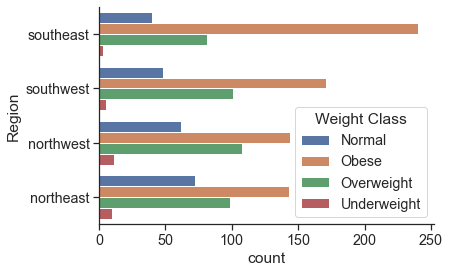

In [34]:
sns.countplot(y = "Region", hue = "Weight Class", data = insurance_cleaned)

Again, the 'South-east' region has the highest number of Obese people by a large margin. Now we only need to check for the region with the oldest citizens before we are able to answer our *RQ 2*

The Following graph shows a representation of different Age groups across each region:

[Text(0.5, 1.0, 'Age Group Representation in Different Regions')]

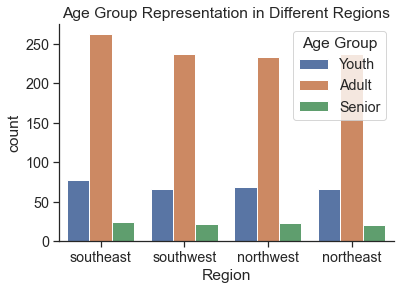

In [36]:
sns.countplot(x = "Region", hue = "Age Group", data = insurance_cleaned).set(title = "Age Group Representation in Different Regions")

Once again, the 'South East' Region has the highest number of Senior Citizens, as well as adults who are older than 24. Since the 'South-east' region is most affected by all 3 factors, we predict that it it also the region with the highest average insurance cost. Lets find out; The following is the table showcasing average insurance costs across each region:

In [37]:
# From project_functions, find average Insurance costs by Region. 

pf.insurance_avg_by_region(insurance_cleaned)

Insurance Cost
Region                   
southwest    12346.937508
northwest    12417.575169
northeast    13406.384599
southeast    14735.411484

Our prediction was correct; The 'South-east' region has the highest average insurance cost since all 3 factors that affect insurance cost are most prevalent in that region. Therefore, our *RQ 2* has also been answered.

In conclusion, we found out that:

***A1. The factors that affect insurance cost are Age, BMI and Smoker. Age and Smoker have a strong positive correlation to insurance cost, while BMI has a weak positive correlation.***

***A2. The 'South-East' region is the most affected by ALL 3 of the above factors. It is also the region with the highest average insurance cost.***